# Import dependencies

In [5]:
import os

import tensorflow as tf; print(tf.__version__)

from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

2.15.0


# Define function to read and verify images

In [6]:
def verify(img1_path, img2_path, model_name):
    img1= cv2.imread(img1_path)
    img2= cv2.imread(img2_path)
    
    plt.imshow(img1[:,:,::-1])
    plt.show()
    plt.imshow(img2[:,:,::-1])
    plt.show()
   #  model = build_model(model_name)
    output = DeepFace.verify(img1_path=img1_path, img2_path=img2_path, model_name=model_name)

    print(output)
    
    verification = output['verified']
    
    if verification:
       print('They are same')
    else:
       print('The are not same')

# Verify samples

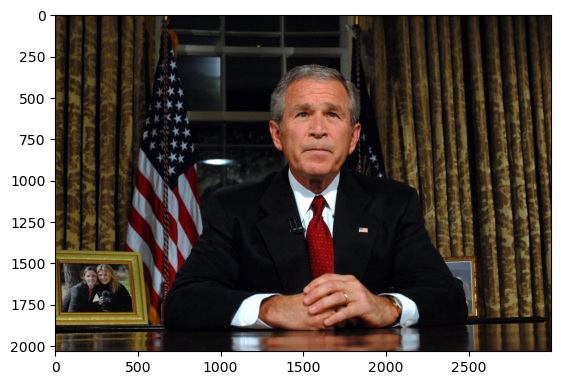

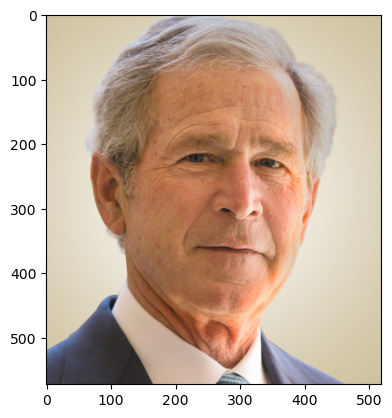

{'verified': False, 'distance': 0.7467859849756882, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 1299, 'y': 371, 'w': 575, 'h': 575, 'left_eye': (201, 236), 'right_eye': (376, 239)}, 'img2': {'x': 139, 'y': 111, 'w': 308, 'h': 308, 'left_eye': None, 'right_eye': None}}, 'time': 8.85}
The are not same


In [7]:
verify(os.path.abspath('data/faces/samples/img11.jpg'), os.path.abspath('data/faces/samples/img12.jpg'), 'VGG-Face')

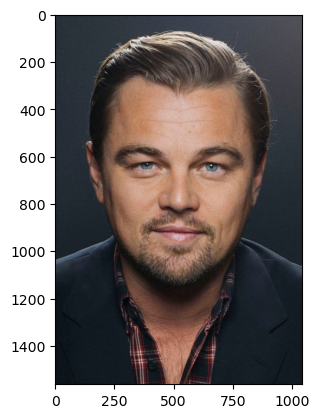

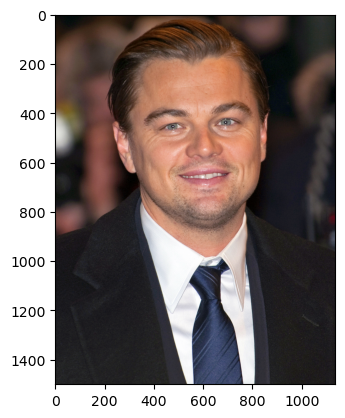

{'verified': True, 'distance': 0.4349287395067142, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 161, 'y': 351, 'w': 726, 'h': 726, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 261, 'y': 188, 'w': 644, 'h': 644, 'left_eye': (211, 269), 'right_eye': (428, 253)}}, 'time': 2.33}
They are same


In [4]:
verify(os.path.abspath('data/faces/samples/img3.jpg'), os.path.abspath('data/faces/samples/img4.jpg'), 'VGG-Face')

In [5]:
embedding_objs = DeepFace.represent(
  img_path = os.path.abspath('data/faces/samples/img11.jpg')
)
print(embedding_objs)

[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06415091906169286, 0.0, 0.0, 0.006086792811235164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04470718304813623, 0.05005050410339101, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.025674879401382206, 0.0, 0.04521051456006563, 0.0, 0.01949573964975163, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003760285032214263, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048269627135110744, 0.0, 0.0, 0.021354640529835465, 0.0, 0.0, 0.0, 0.0, 0.011879247705908223, 0.0, 0.023716624146699467, 0.0, 0.0, 0.0, 0.0, 0.009153379875763938, 0.0, 0.0, 0.043834264754505796, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11219576902196834, 0.0, 0.0, 0.06940458155316488, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009182838464685024, 0.0, 0.0, 0.03587803102186423, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.023251462767666875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

# Facial Attribute Analysis using Deepface

Action: emotion: 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]


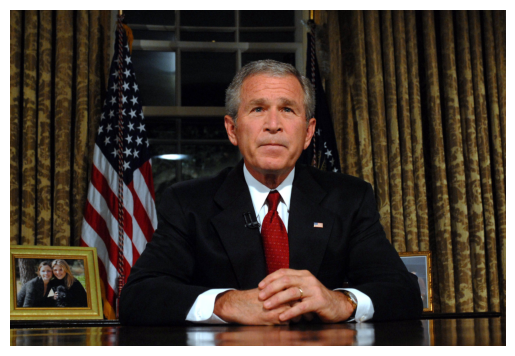

Age: 27
Gender: {'Woman': 1.8311426043510437, 'Man': 98.16885590553284}
Dominant Emotion: happy


In [6]:
img_path = 'data/faces/samples/img11.jpg' # Enter Your Image Path
img = cv2.imread(os.path.abspath(img_path))

result = DeepFace.analyze(img, actions=['age', 'gender', 'emotion'])

result = result[0]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print(f"Age: {result['age']}")
print(f"Gender: {result['gender']}")
print(f"Dominant Emotion: {result['dominant_emotion']}")

25-10-13 21:33:57 - Searching c:\Users\lynvp\OneDrive\Documents\GitHub\computer-vision-verification-experiments\notebooks\data\faces\input1.jpg in 15 length datastore
25-10-13 21:33:59 - find function duration 2.0264205932617188 seconds


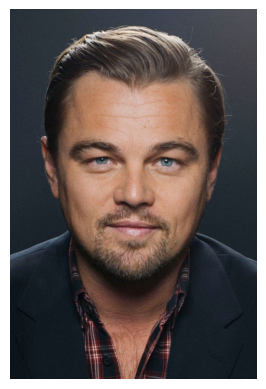

c:\Users\lynvp\OneDrive\Documents\GitHub\computer-vision-verification-experiments\notebooks\data\faces\samples\img3.jpg
0.3567398512851775


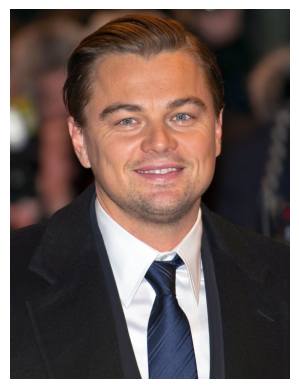

c:\Users\lynvp\OneDrive\Documents\GitHub\computer-vision-verification-experiments\notebooks\data\faces\samples\img4.jpg
0.558491108193566


In [7]:
results = DeepFace.find(
  img_path = os.path.abspath("data/faces/input1.jpg"),
  db_path = os.path.abspath("data/faces/samples"),
)[0]

for index, row in results.iterrows():
    file_path = row['identity']
    imgdb = cv2.imread(file_path)
    plt.imshow(cv2.cvtColor(imgdb, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print(file_path)
    print(row['distance'])
    